### Customer Rating Data By Amazon Using AdaBoostRegressor and XGBRegressor
Amazon Customer rating for recommendation system

#### About Dataset

#### Context:
In the ever-evolving world of e-commerce, Amazon.com stands as a pioneering giant. Known for its innovative spirit and remarkable journey, Amazon has not only experienced glorious heights but also faced intriguing challenges along the way. Here are some fascinating insights:

#### Dataset Overview:

Now, let's delve into the dataset at hand. It comprises an extensive collection of over 2 million customer reviews and ratings of beauty-related products available on Amazon's platform. The dataset includes valuable information such as:

Unique User IDs for customer identification.
Product ASIN (Amazon's distinctive product identifier).
Ratings, which reflect customer satisfaction on a scale from 1 to 5.
Timestamps, recorded in UNIX time, indicating when the ratings were submitted.
Acknowledgments:
This dataset is just a fragment of the extensive Amazon product dataset, encompassing a staggering 142.8 million reviews spanning the period from May 1996 to July 2014. The complete dataset provides a wealth of information, including detailed product reviews, metadata, category information, pricing data, brand details, and even image features.

#### A Costly Downtime:

In August 2013, Amazon encountered a 40-minute website downtime, causing a notable loss of $4.8 million. This incident highlights the critical importance of maintaining a seamless online presence.
The 1-Click Innovation:

Amazon's inventive prowess is exemplified by its patent on the "1-Click" buying feature. This technology was not only a game-changer for Amazon but is also licensed to other tech giants, including Apple.
Warehouses on Steroids:

Amazon's Phoenix fulfillment center is a colossal structure, spanning a jaw-dropping 1.2 million square feet. It serves as a testament to the logistics marvel that powers the company's global operations.
The Power of Recommendations:

Amazon leverages a robust recommendation engine that relies on customer ratings and purchase history to provide personalized product suggestions. This engine is pivotal in enhancing customer satisfaction and driving sales.

#### Inspiration:
Now, the challenge lies in leveraging this condensed dataset to build a powerful recommendation engine. Can we tap into this data to create a recommendation system that mirrors the capabilities of Amazon's own engine? It's an exciting endeavor, and your innovative ideas and solutions are the driving force behind this exploration.

#### Step 1: Import Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2: Load the Dataset 

In [2]:
data = pd.read_csv('customer_ratings_data.csv')
data.head(10)

,User Id,Product Id,Rating,Time stamp
0,A39HTATAQ9V7YF,205616461,5,1369699200
1,A3JM6GV9MNOF9X,558925278,3,1355443200
2,A1Z513UWSAAO0F,558925278,5,1404691200
3,A1WMRR494NWEWV,733001998,4,1382572800
4,A3IAAVS479H7M7,737104473,1,1274227200
5,AKJHHD5VEH7VG,762451459,5,1404518400
6,A1BG8QW55XHN6U,1304139212,5,1371945600
7,A22VW0P4VZHDE3,1304139220,5,1373068800
8,A3V3RE4132GKRO,130414089X,5,1401840000
9,A327B0I7CYTEJC,130414643X,4,1389052800


#### Step 3: Data Exploration and Cleaning

Data Exploration: Understand the distribution of ratings. Check for missing values and handle them appropriately. Explore unique users and products in the dataset.

Data Cleaning: Remove duplicates if any. Handle outliers or anomalies in the data. Convert the timestamp to a more human-readable format for analysis.

In [3]:
data.columns

Index(['User Id', 'Product Id', 'Rating', 'Time stamp'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   User Id     1048575 non-null  object
 1   Product Id  1048575 non-null  object
 2   Rating      1048575 non-null  int64 
 3   Time stamp  1048575 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 32.0+ MB


In [5]:
data.isnull().sum()

User Id       0
Product Id    0
Rating        0
Time stamp    0
dtype: int64

In [6]:
data.Rating.value_counts()

Rating
5    664210
4    151249
1     94265
3     81742
2     57109
Name: count, dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

# Handle outliers/anomalies in the data (assuming Rating is on a scale of 1 to 5)
data = data[(data['Rating'] >= 1) & (data['Rating'] <= 5)]

# Convert the timestamp to a more human-readable format
data['Timestamp'] = pd.to_datetime(data['Time stamp'], unit='s')
data.drop(['Time stamp'], axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   User Id     1048575 non-null  object        
 1   Product Id  1048575 non-null  object        
 2   Rating      1048575 non-null  int64         
 3   Timestamp   1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 32.0+ MB


In [9]:
data.Rating.describe()

count    1.048575e+06
mean     4.176864e+00
std      1.306543e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

### Exploratory data analysis (EDA)
#### Step 4: Visualize the Data 

#### Distribution Plot

C:\Users\Dell\AppData\Local\Temp\ipykernel_7464\1002940382.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],bins=10)


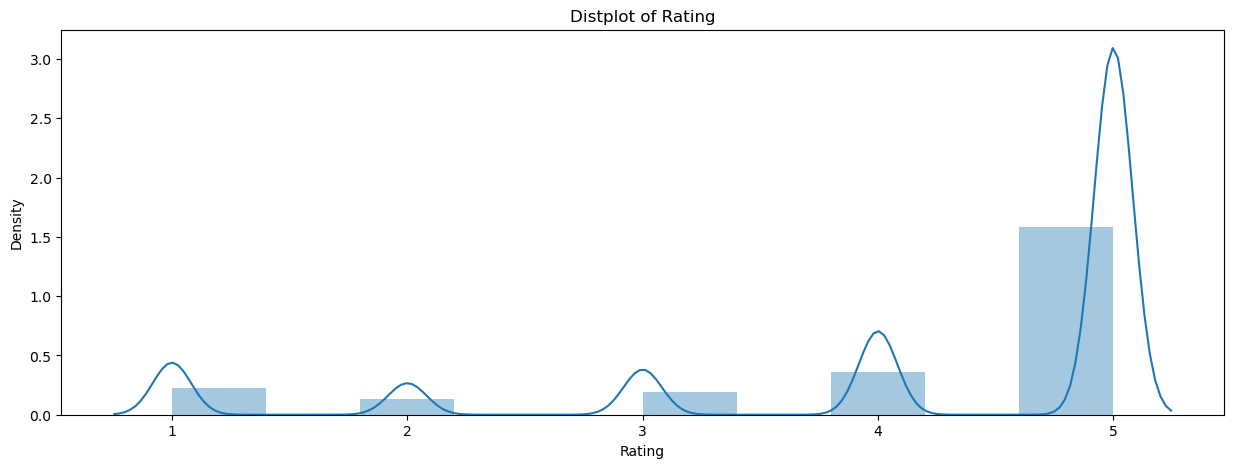

In [10]:
def distplot(cols):
    plt.figure(1 , figsize = (15,5))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,len(cols),n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Distplot of {0}'.format(i))
        sns.distplot(data[i],bins=10)
    plt.show()
    
distplot(['Rating'])

#### Boxplot 

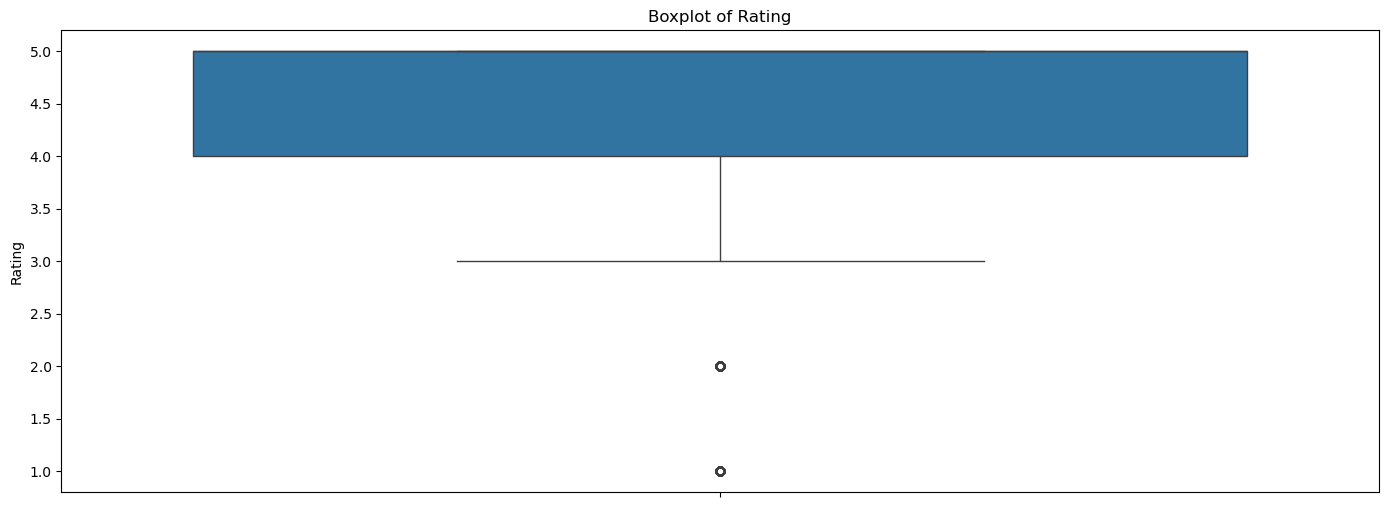

In [12]:
def boxplot(cols):
    plt.figure(1 , figsize = (17,6))
    n = 0
    for i in cols:
        n +=1
        plt.subplot(1,len(cols),n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Boxplot of {0}'.format(i))
        sns.boxplot(data[i])
    plt.show()
    
boxplot(['Rating'])

#### Pie Chart

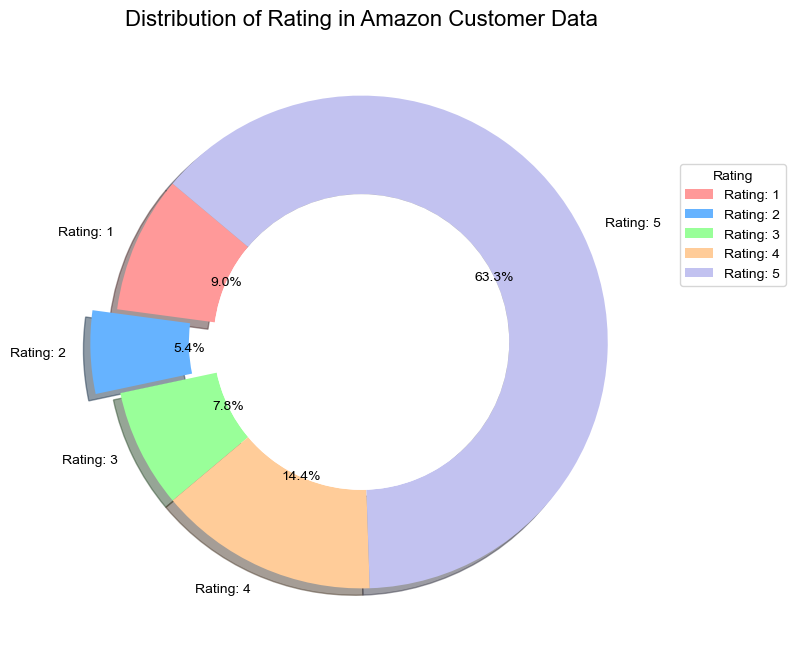

In [13]:
count = data.groupby('Rating').size().reset_index(name='Count')

labels = ['Rating: 1', 'Rating: 2', 'Rating: 3', 'Rating: 4', 'Rating: 5']
sizes = count['Count']

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Exploding the 2nd slice (Age 10-19)
explode = (0, 0.1, 0, 0, 0)

# Create a subplot with a single axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting the pie chart with a shadow and rounded corners
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops=dict(width=0.4))
ax.set_title('Distribution of Rating in Amazon Customer Data', fontsize=16)

# Adding a legend
ax.legend(title='Rating', loc='upper right', bbox_to_anchor=(1.2, 0.8))

# Adding a circle in the middle to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
ax.add_artist(centre_circle)

# Using Seaborn to set the background style
sns.set(style="whitegrid")

# Show the plot
plt.show()

#### Bar Plot 

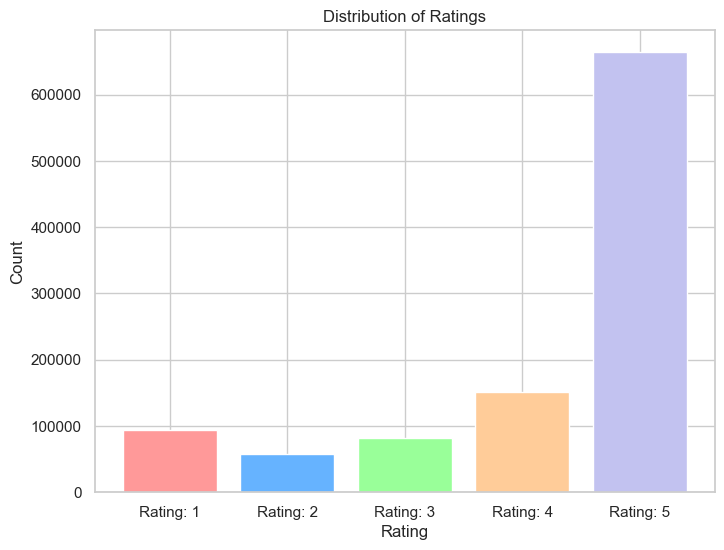

In [14]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.figure(figsize=(8, 6))
plt.bar(count['Rating'], count['Count'], color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(count['Rating'], labels=['Rating: 1', 'Rating: 2', 'Rating: 3', 'Rating: 4', 'Rating: 5'])
plt.show()

In [15]:
data['Year'] = data['Timestamp'].dt.year
data.head(5)

,User Id,Product Id,Rating,Timestamp,Year
0,A39HTATAQ9V7YF,205616461,5,2013-05-28,2013
1,A3JM6GV9MNOF9X,558925278,3,2012-12-14,2012
2,A1Z513UWSAAO0F,558925278,5,2014-07-07,2014
3,A1WMRR494NWEWV,733001998,4,2013-10-24,2013
4,A3IAAVS479H7M7,737104473,1,2010-05-19,2010


    Year   Count
0   1998       2
1   1999       5
2   2000      16
3   2001      76
4   2002     163
5   2003     277
6   2004    1302
7   2005    3455
8   2006    5939
9   2007   17584
10  2008   28479
11  2009   40802
12  2010   66458
13  2011  110206
14  2012  169099
15  2013  376439
16  2014  228273


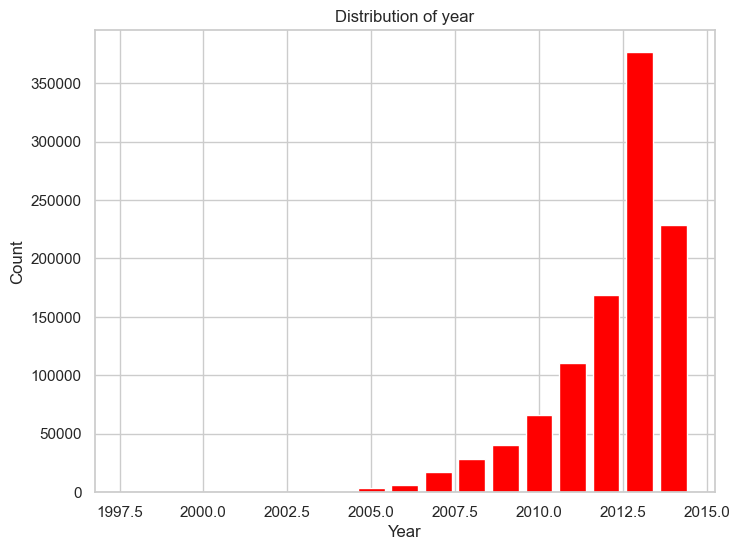

In [16]:
count_year = data.groupby('Year').size().reset_index(name='Count')
print(count_year)

plt.figure(figsize=(8, 6))
plt.bar(count_year['Year'], count_year['Count'], color='red')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of year')
plt.show()

#### Violin Plot

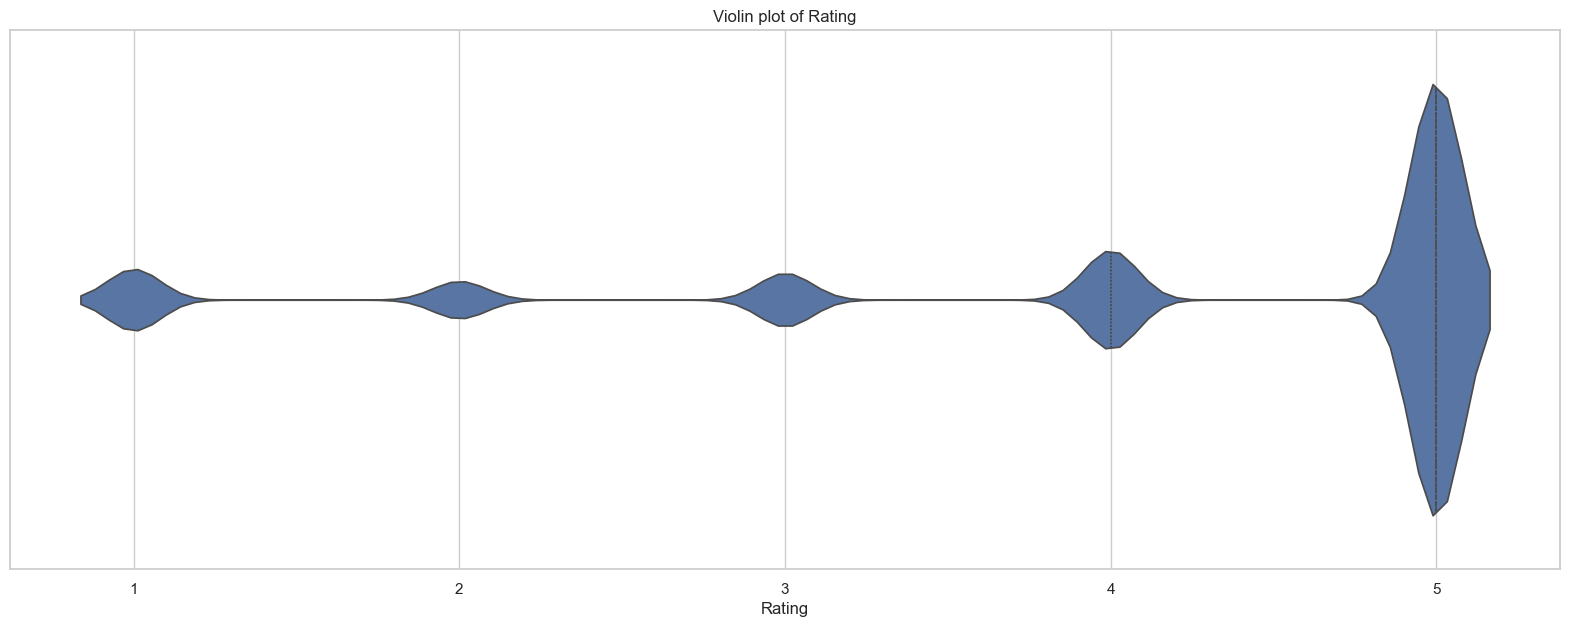

In [17]:
def violinplot(cols, data):
    plt.figure(1, figsize=(20, 7))
    n = 0
    for i in cols:
        n += 1
        plt.subplot(1, len(cols), n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        plt.title('Violin plot of {0}'.format(i))
        sns.violinplot(x=data[i], inner="quartile")  # Use x=data[i] to specify the column for the violinplot
    plt.show()

# Assuming 'df' is your DataFrame
violinplot(['Rating'], data=data)

#### Line Plot 

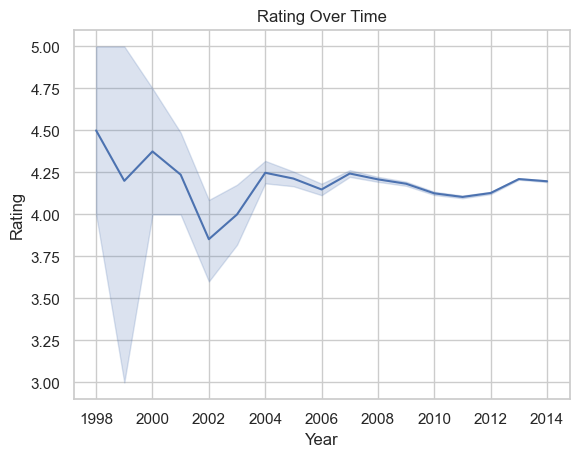

In [18]:
# Assuming 'data' is your DataFrame with 'Year' and 'Rating' columns
sns.lineplot(x='Year', y='Rating', data=data)
plt.title('Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

#### Heatmap 

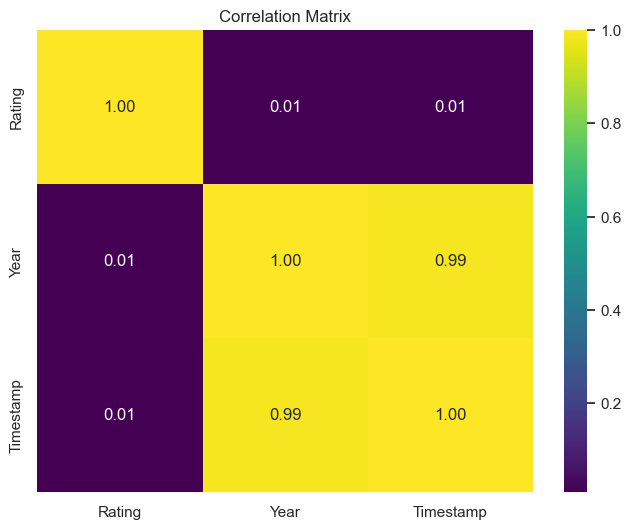

In [19]:
correlation_matrix = data[['Rating','Year','Timestamp']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Step 5: Data Preprocessing
Data Transformation: Convert categorical variables (User Id and Product Id) into numerical representations if needed. Normalize or scale numerical features if required.

Train-Test Split: Split the dataset into training and testing sets for model evaluation. 

#### Step 6: Import Necessary Libraries For Model Creation 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Step 7: Feature Scaling

In [21]:
label_encoder = LabelEncoder()
data['User Id'] = label_encoder.fit_transform(data['User Id'])
data['Product Id'] = label_encoder.fit_transform(data['Product Id'])

In [22]:
scaler = StandardScaler()
data['Rating'] = scaler.fit_transform(data['Rating'].values.reshape(-1, 1))

In [23]:
X = data[['User Id','Product Id']]
y = data['Rating']

#### Train-Test Split 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

#### Step 8: Build AdaBoostRegressor Model 

AdaBoost RMSE: 1.0137637972370974
AdaBoost Accuracy: 0.14413847364280094
AdaBoost Confusion Matrix:
[[     0      8  30458      0]
 [     0      2  16370      0]
 [     0      3  30226      0]
 [     0      2 132646      0]]


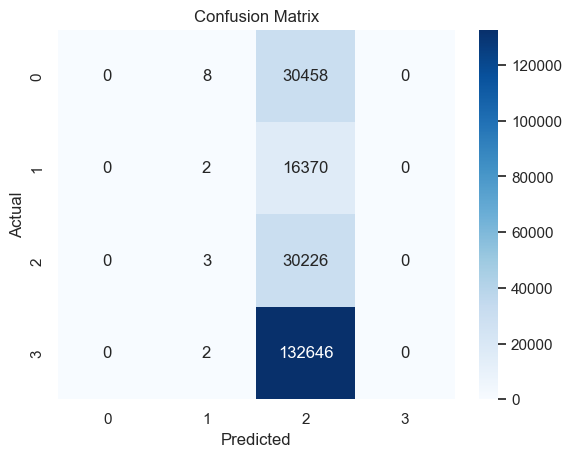

In [27]:
# AdaBoost
ada_model = AdaBoostRegressor(n_estimators=750, learning_rate=0.1)
ada_model.fit(X_train, y_train)

ada_predictions = ada_model.predict(X_test)

ada_rmse = mean_squared_error(y_test, ada_predictions, squared=False)
ada_class_predictions = np.round(ada_predictions)
ada_accuracy = accuracy_score(y_test.round(), ada_class_predictions)
ada_conf_matrix = confusion_matrix(y_test.round(), ada_class_predictions)

print(f"AdaBoost RMSE: {ada_rmse}")
print(f"AdaBoost Accuracy: {ada_accuracy}")
print("AdaBoost Confusion Matrix:")
print(ada_conf_matrix)

sns.heatmap(ada_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Step 9: Build XGBRegressor Model 

XGBoost RMSE: 1.001505977610639
XGBoost Accuracy: 0.1441146317621534
XGBoost Confusion Matrix:
[[     5     33  30428      0]
 [     1     23  16348      0]
 [     3     31  30195      0]
 [     1    115 132532      0]]


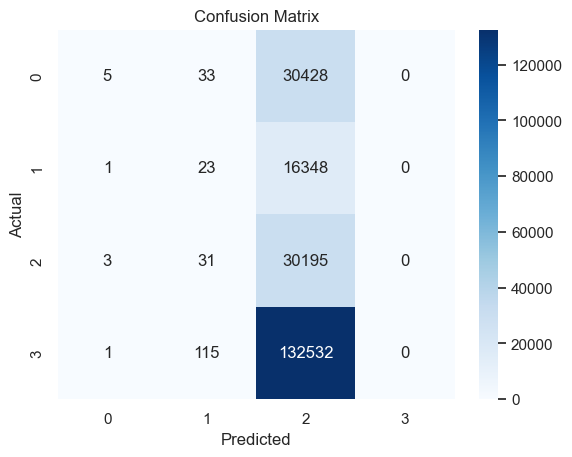

In [28]:
xgb_model = XGBRegressor(n_estimators=750, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_predictions, squared=False)
xgb_class_predictions = np.round(xgb_predictions)
xgb_accuracy = accuracy_score(y_test.round(), xgb_class_predictions)
xgb_conf_matrix = confusion_matrix(y_test.round(), xgb_class_predictions)

print(f"XGBoost RMSE: {xgb_rmse}")
print(f"XGBoost Accuracy: {xgb_accuracy}")
print("XGBoost Confusion Matrix:")
print(xgb_conf_matrix)

sns.heatmap(xgb_conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Step 10: Creating plots using actual data and prediction data

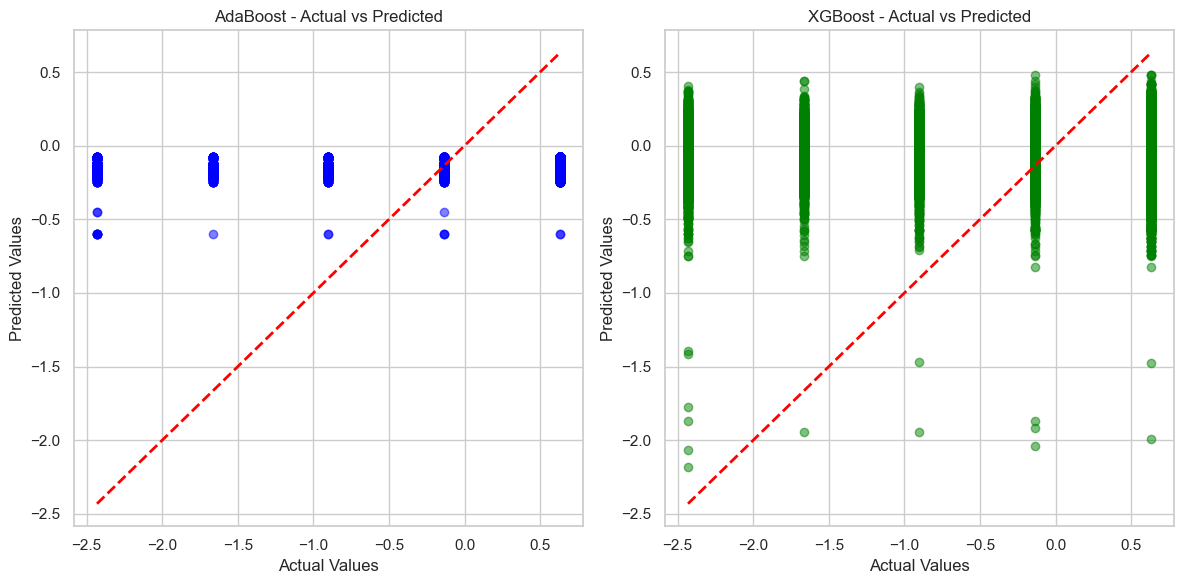

In [29]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Assuming you have both `ada_predictions` and `xgb_predictions` arrays

plt.figure(figsize=(12, 6))

# Scatter plot for AdaBoost
plt.subplot(1, 2, 1)
plt.scatter(y_test, ada_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('AdaBoost - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_predictions, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('XGBoost - Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


#### Step 11: Save the Models 

In [31]:
import joblib

# Save AdaBoost model
joblib.dump(ada_model, 'ada_model.pkl')

['ada_model.pkl']

In [32]:
# Save XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

#### Step 12: Make prediction using AdaBoost model

In [33]:
# Load AdaBoost model
loaded_ada_model = joblib.load('ada_model.pkl')

# Assuming single_data_point is a NumPy array with the same features as in your training data
single_data_point = np.array([496277, 108])

# Reshape the array if needed (the number of features should match the original training data)
single_data_point = single_data_point.reshape(1, -1)

# Make predictions using the saved AdaBoost model
ada_prediction = loaded_ada_model.predict(single_data_point)


print("AdaBoost Prediction:", ada_prediction)


AdaBoost Prediction: [-0.16570301]


C:\Users\Dell\.conda\envs\Machine Learning\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


#### Step 13: Make prediction using XGBoost model

In [34]:
# Load XGBoost model
loaded_xgb_model = joblib.load('xgb_model.pkl')

# Assuming single_data_point is a NumPy array with the same features as in your training data
single_data_point1 = np.array([496277, 108])

# Reshape the array if needed (the number of features should match the original training data)
single_data_point1 = single_data_point1.reshape(1, -1)

# Make predictions using the saved XGBoost model
xgb_prediction = loaded_xgb_model.predict(single_data_point1)

print("XGBoost Prediction:", xgb_prediction)


XGBoost Prediction: [0.1268383]


### -------------------------------------------------------------------END-------------------------------------------------------------------------- 